In [ ]:
import sqlite3              
import pandas as pd         
import matplotlib.pyplot as plt  

In [ ]:
conn = sqlite3.connect("sales_data.db")  
cursor = conn.cursor() 


In [ ]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

In [ ]:
fruits_data = [
    ('Apples', 10, 2.5),     
    ('Bananas', 20, 1.0),
    ('Oranges', 15, 1.8),
    ('Apples', 5, 2.5),
    ('Bananas', 10, 1.0),
    ('Oranges', 10, 1.8)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", fruits_data)
conn.commit() 


In [ ]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print("Sales Summary:")
print(df)

Sales Summary:
   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         30     30.0
2  Oranges         25     45.0


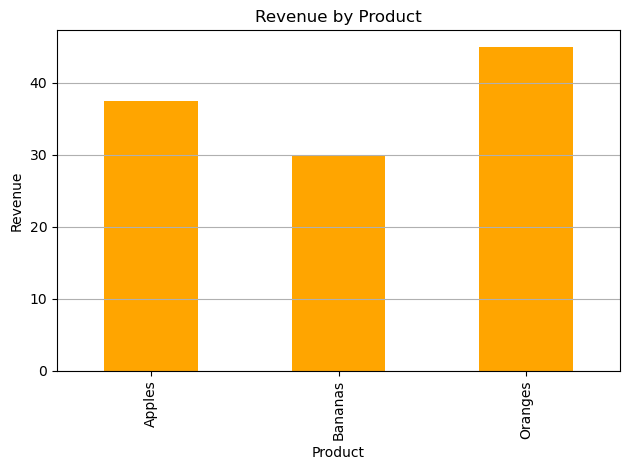

In [ ]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.grid(axis='y')
plt.tight_layout()
plt.show()